In [1]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import cv2                                 
import tensorflow as tf
import PIL.ImageOps as ImageOps
import PIL.Image as Image
from tqdm import tqdm

In [2]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)


Mounted at /content/gdrive


In [3]:
# Now we create the class names and store them in the labels.

class_names = ['Basale',
               'Guava',
               'Neem',
               'Sandalwood',
               'Tulsi']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (150, 150)

In [4]:
def pre_process(img_path):
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, IMAGE_SIZE) 
    return image

In [5]:
#updated one
def load_data():
    
    datasets = '/content/gdrive/MyDrive/plant_dataset'
    
    # Iterate through training and test sets
    images = []
    labels = []
    print("Loading {}".format(datasets))
        
        # Iterate through each folder corresponding to a category
    for folder in os.listdir(datasets):
      label = class_names_label[folder]
            
            # Iterate through each image in our folder
      for file in tqdm(os.listdir(os.path.join(datasets, folder))):
                
                # Get the path name of the image
          img_path = os.path.join(os.path.join(datasets, folder), file)
                
                # Open and resize the img
          image = pre_process(img_path) 
                
                # Append the image and its corresponding label to the output
          images.append(image)
          labels.append(label)
                
    images = np.array(images, dtype = 'float32')
    labels = np.array(labels, dtype = 'int32')   
        

        
        
    return images,labels

In [6]:
train_images, train_labels = load_data()

Loading /content/gdrive/MyDrive/plant_dataset


100%|██████████| 103/103 [00:04<00:00, 22.52it/s]


In [7]:
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)
test_images, test_labels = train_images[:70], train_labels[:70]
train_images, train_labels = train_images[70:], train_labels[70:]

In [8]:
#for future divide the train_labels to train_labels and test_labels 80-20
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

print ("Number of training examples: {}".format(n_train))
print ("Number of testing examples: {}".format(n_test))
print ("Each image is of size: {}".format(IMAGE_SIZE))

Number of training examples: 277
Number of testing examples: 70
Each image is of size: (150, 150)


In [9]:
train_images = train_images / 255.0 
test_images = test_images / 255.0

In [10]:
def display_examples(class_names, images, labels):
    
    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

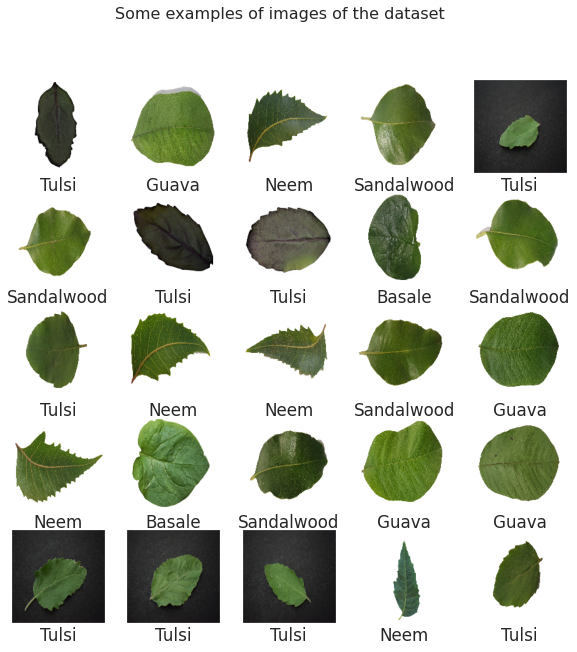

In [11]:
display_examples(class_names, train_images, train_labels)

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(30, activation=tf.nn.softmax)
])

In [13]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [14]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=20, validation_split = 0.2)

Epoch 1/20
2/2 [==============================] - 7s 3s/step - loss: 5.8166 - accuracy: 0.1719 - val_loss: 7.9101 - val_accuracy: 0.2857
Epoch 2/20
2/2 [==============================] - 5s 2s/step - loss: 7.2595 - accuracy: 0.1719 - val_loss: 7.4046 - val_accuracy: 0.1250
Epoch 3/20
2/2 [==============================] - 6s 3s/step - loss: 4.8172 - accuracy: 0.1991 - val_loss: 4.0467 - val_accuracy: 0.1429
Epoch 4/20
2/2 [==============================] - 6s 3s/step - loss: 2.6317 - accuracy: 0.2081 - val_loss: 2.0098 - val_accuracy: 0.4464
Epoch 5/20
2/2 [==============================] - 10s 4s/step - loss: 1.7317 - accuracy: 0.5068 - val_loss: 1.4206 - val_accuracy: 0.6607
Epoch 6/20
2/2 [==============================] - 6s 3s/step - loss: 1.3353 - accuracy: 0.6063 - val_loss: 1.0067 - val_accuracy: 0.6250
Epoch 7/20
2/2 [==============================] - 5s 2s/step - loss: 1.0015 - accuracy: 0.6018 - val_loss: 0.8997 - val_accuracy: 0.6250
Epoch 8/20
2/2 [========================

In [15]:
def plot_accuracy_loss(history):
    """
        We plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'],'bo--', label = "accuracy")
    plt.plot(history.history['val_accuracy'], 'ro--', label = "val_accuracy")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

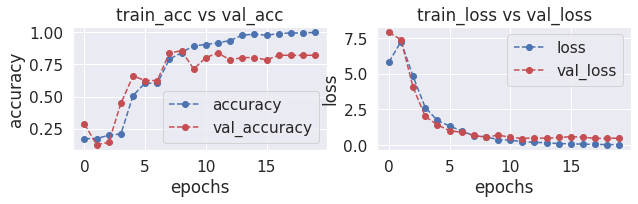

In [16]:
plot_accuracy_loss(history)

In [17]:
test_loss = model.evaluate(test_images, test_labels)

3/3 [==============================] - 0s 126ms/step - loss: 0.2294 - accuracy: 0.9571


In [18]:
# A function to simply display only one random image
def display_random_image(class_names, images, labels):
    
    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{} : '.format(index) + class_names[labels[index]])
    plt.show()

9/9 [==============================] - 2s 193ms/step


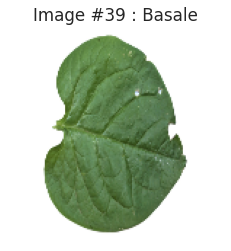

In [19]:
predictions = model.predict(train_images)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability

display_random_image(class_names, train_images, pred_labels)

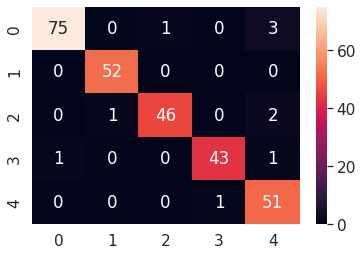

In [20]:
y_true=train_labels
y_pred=pred_labels
sn.heatmap(confusion_matrix(y_true, y_pred),annot=True);

In [23]:
data = np.ndarray(shape=(1, 150, 150, 3), dtype=np.float32)
image = Image.open('/content/gdrive/MyDrive/plant_dataset/Basale/BA-S-029.jpg')
#image sizing
size = (150, 150)
image = ImageOps.fit(image, size, Image.ANTIALIAS)

#turn the image into a numpy array
image_array = np.asarray(image)
# Normalize the image
normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1

# Load the image into the array
data[0] = normalized_image_array

# run the inference
prediction = model.predict(data)
pred_label = np.argmax(prediction, axis = 1) # We take the highest probability
class_prediction = class_names[pred_label[0]]

1/1 [==============================] - 0s 50ms/step


In [24]:

if class_prediction == 'Basale':
    print('Basale: Basale has an anti-inflammatory activity and wound healing ability. It can be helpful as a first aid, and the leaves of this plant can be crushed and applied to burns, scalds and wounds to help in healing of the wounds.')
if class_prediction == 'Guava':
    print('Guava: Aside from bearing a delicious taste, the fruit of the Guava tree is a rich source of Vitamin C and antioxidants. It is especially effective against preventing infections such as Gastrointestinal infections, Respiratory infections, Oral/dental infections and Skin infections. It can also aid in the treatment of Hypertension, Fever, Pain, Liver and Kidney problems. ')
if class_prediction == 'Neem':
    print('Neem: Prevalent in traditional remedies from a long time, Neem is considered as a boon for Mankind. It helps to cure many skin diseases such as Acne, fungal infections, dandruff, leprosy, and also nourishes and detoxifies the skin. It also boosts your immunity and act as an Insect and Mosquito Repellent. It helps to reduce joint paint as well and prevents Gastrointestinal Diseases')
if class_prediction == 'Sandalwood':
    print('Sandalwood: Sandalwood is used for treating the common cold, cough, bronchitis, fever, and sore mouth and throat. It is also used to treat urinary tract infections (UTIs), liver disease, gallbladder problems, heatstroke, gonorrhea, headache, and conditions of the heart and blood vessels (cardiovascular disease).')
if class_prediction == 'Tulsi':
    print('Tulsi: Tulsi plant has the potential to cure a lot of ailments, and is used a lot in traditional remedies. Tulsi can help cure fever, to treat skin problems like acne, blackheads and premature ageing, to treat insect bites. Tulsi is also used to treat heart disease and fever, and respiratory problems.')


Guava: Aside from bearing a delicious taste, the fruit of the Guava tree is a rich source of Vitamin C and antioxidants. It is especially effective against preventing infections such as Gastrointestinal infections, Respiratory infections, Oral/dental infections and Skin infections. It can also aid in the treatment of Hypertension, Fever, Pain, Liver and Kidney problems. 


In [25]:
model.save('plantmodel.h5')